In [3]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

1.) We are interested in how well ESPN does at predicting how well a player will perform in fantasy football. 

Go to the ESPN website from 2017 here to see how many fantasy points each player had ACTUALLY scored by the end of the season.

http://games.espn.com/ffl/leaders?

Notice at the end of the "Offensive players" tab it says "Next". Click on "Next a few times to see how the website url changes.

The webpages start at index 0 and increment by 50. Create a list called urls that contains the first 6 urls. Do this by using a for loop and not by typing them in manually.

In [ ]:
#insert 1

2.Go to the first url and use pd.read_html to read in the info. Save the dataframe with the name "table".

In [ ]:
#insert 2

3.Drop the three non-player rows from the table. Make sure the changes save.

In [ ]:
#insert 3

4.Okay. Now you are going to loop through and add the dataframes you get from visiting the other urls to the bottom of the dataframe you got from the first url. You can do this by using the following command within the for loop:

table = pd.concat([table, new_table])

Be sure to drop the first TWO rows from the new table that you read in each time before you add them to the old table (since the first two rows don't contain player names). Also be sure NOT to read the first URL in again or else you'll have a bunch of duplicates.

In [ ]:
#insert 4

5.Reduce the dataframe to just two columns: the player name renamed as "player" and the player total points renamed as "2017 points".

In [ ]:
#insert 5

6.Drop rows that are missing ANY entries. Then, reset the index. Be sure these changes save.

In [ ]:
#insert 6

7.Notice that the player names contain the name, team, and position. We will want to break this up. First, create a list called playernames that just contains the player names. Do this by splitting the name by spaces and using the join command to join all but the last two elements in the split with a space between them. 

In [ ]:
#insert 7

8.Notice that there is still a comma in a few of the entries. Copy your code above below and correct it to split on a comma if there is still a comma remaining and saving only the correct part of the name. You should now have a correct list called playernames.


In [11]:
#insert 8

9.Create a list called positions that contains just the player positions and a list called teams that just contains the teams.

In [13]:
#insert 9

10.Create a new data frame called "df1" where the player name called "player" is in the first column, the player team is in the second column, the player position is in the third column, and the 2017 points is in the fourth column.

In [15]:
#insert 10

11.Now go to this website to see what ESPN projected the player rankings to be BEFORE the season had started:

http://www.espn.com/fantasy/football/story/_/page/17RanksPreseason200PPR/2017-fantasy-football-ppr-rankings-top-200

Use pd.read_html to read the data in. 

In [18]:
#insert 11

12.Save just the Player/Position/Team column to a dataframe called "df2". Rename the column "player".

In [20]:
#insert 12

13.We want to merge these two data frames. In order to do this, we need the player names to match up exactly. Update the "df2" data frame above to include only the player names - not the numbers, positions, or teams. Use a split and a join command again to do this.

In [22]:
#insert 13

14.We'll want to create another column for what ESPN projected their ranking to be. Luckily, since they are in order, an index of 0 correponds to a ranking of 1, an index of 1 corresponds to a ranking of 2, etc. We can use the index and a list comprehension to create a ranking column:

In [23]:
df2['ranking'] = [int(x)+1 for x in df2.index]
df2.head()

,player,ranking
0,David Johnson,1
1,Le'Veon Bell,2
2,Antonio Brown,3
3,Ezekiel Elliott,4
4,Odell Beckham Jr.,5


15.Okay, we are ready to merge these two dataframes. We'll use "inner" to denote that we only want to consider players that are in BOTH dataframes and we'll use "on=player" to denote that we want to merge the dataframes based on the player column. Merging data frames is a HUGE part of real world data science.

In [27]:
results = pd.merge(df1, df2, how='inner', on = ['player'])
results.head()

,2017 points,player,positions,teams,ranking
0,347.9,Russell Wilson,QB,Sea,79
1,341.6,Le'Veon Bell,RB,Pit,2
2,320.4,Alvin Kamara,RB,NO,152
3,310.3,Antonio Brown,WR,Pit,3
4,309.8,DeAndre Hopkins,Q,WR,28


16.Drop any rows that have any missing values. There might not be, but perform this operation just in case.

In [26]:
#insert 16

17.View all of the column data types using one command.

In [28]:
#insert 17

18.Change the data type of 2017 points to a float.

In [29]:
#insert 18

19.Plot ESPN ranking on the x-axis versus 2017 points scored on the y-axis. Label your axes.

In [31]:
#insert 19

20.Is there a downward trend? Why does this make sense?

In [355]:
#insert 20

21.Go back to the Unit 4 Assignment to remind yourself how to superimpose the line of best fit onto the graph above. Do so below.

In [36]:
#insert 21

22.Print the slope and intercept of the line. 

In [33]:
#insert 22

23.Create another column in the results dataframe called "predicted points" that lists the predicted points from the line of best fit for each player. Note: you can do this in one line. Don't use a loop.

In [37]:
#insert 23

24.Create another column called "residual" that lists the difference between the actual 2017 points and the predicted ESPN points. Do this in one line.

In [39]:
#insert 24

25.Sort the dataframe by predicted points from lowest to highest to see the most overrated players.

In [41]:
#insert 25

26.R-squared is a measure of how well your model fits your data. R-squared gives the fraction of the data's variation accounted for by the model. Use the function below to calculate R-squared of your model. 

In [42]:
def rsquared(x, y, y_predicted):                   
    ybar = np.sum(y)/len(y)          
    ssreg = np.sum((y_predicted-ybar)**2)  
    sstot = np.sum((y - ybar)**2)  
    return ssreg / sstot

#insert your function call here

27.That R-squared was very low. Let's try to do better.

Up until now, you've only been able to create predictive models with numerical variables (e.g. rankings, points, etc.) However, we can also create regression models using categorical variables (such as football position!) Very exciting. 

In addition, up until now, you have probably only calculated a linear regression line when you have a single input variable. Today, we'll use multiple linear regression (where the input will be a matrix instead of a single vector).

Our goal will be to use ESPN rankings (numerical) AND player position (categorical) to predict their fantasy points.

Step 1: Create a new dataframe from the results dataframe called onehot that includes just the positions and ranking columns. (I'll explain why it's called onehot in a minute).

In [44]:
#insert 27

28.Now, a major step towards performing regression when there are categorical variables involved is first creating a matrix (called a one-hot matrix) where each position corresponds to a different column in the matrix. For example, if a player is a QB, he'll have a 1 in the QB column and a 0 in all of the other position columns. 

We can create this matrix easily using a package called patsy. First download it. Type into your terminal:

pip install --upgrade patsy

Then run the following code.

In [45]:
import patsy
positions = patsy.dmatrix('positions',data=onehot,return_type='dataframe')
onehot.drop(['positions'], axis=1, inplace=True)
onehot = onehot.join(positions)
onehot.head()

/Users/shareshianl/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,ranking,Intercept,positions[T.QB],positions[T.RB],positions[T.TE],positions[T.WR]
0,79,1.0,1.0,0.0,0.0,0.0
1,2,1.0,0.0,1.0,0.0,0.0
2,152,1.0,0.0,1.0,0.0,0.0
3,3,1.0,0.0,0.0,0.0,1.0
4,28,1.0,0.0,0.0,0.0,0.0


29.Okay. Our input is going to be this matrix and our output is going to be the 2017 points. We'll need to download the scikit-learn package in order to use the the multiple linear regression model. scikit-learn is the most popular package for maching learning algorithms using Python. So exciting!!!

Type this into your terminal:

pip install -U scikit-learn

Then, run the following code.

In [46]:
from sklearn.linear_model import LinearRegression

X = onehot
y = results['2017 points']

clf = LinearRegression()
clf.fit(X, y)
clf.predict(X)
print('R-squared', clf.score(X,y))

R-squared 0.26203706276


/Users/shareshianl/anaconda/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


30.Wow! Our R-squared increased three-fold when we incorporated the player position into our input. Let's visualize what is going on with this multiple linear regression by creating the following plot below:

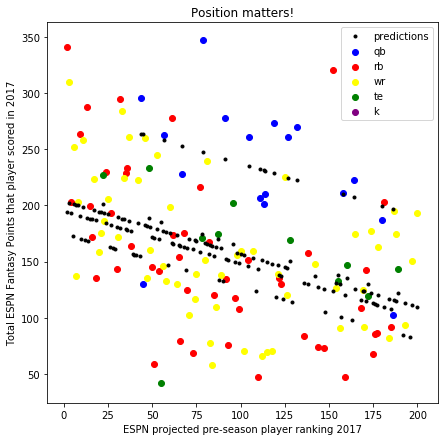

In [47]:
#Let's break things down by position:
quarterbacks = results[results['positions'] == 'QB']
runningbacks = results[results['positions'] == 'RB']
receivers = results[results['positions'] == 'WR']
tightends = results[results['positions'] == 'TE']
kickers = results[results['positions'] == 'K']

fig, ax = plt.subplots(figsize=(7,7))

ax.scatter(quarterbacks.ranking, quarterbacks['2017 points'],  color='blue', label='qb')
ax.scatter(runningbacks.ranking, runningbacks['2017 points'],  color='red', label='rb')
ax.scatter(receivers.ranking, receivers['2017 points'],  color='yellow', label = 'wr')
ax.scatter(tightends.ranking, tightends['2017 points'],  color='green', label = 'te')
ax.scatter(kickers.ranking, kickers['2017 points'],  color='purple', label = 'k')
ax.plot(X.ranking, clf.predict(X), 'k.', label = 'predictions')
ax.set_xlabel('ESPN projected pre-season player ranking 2017')
ax.set_ylabel('Total ESPN Fantasy Points that player scored in 2017')
ax.set_title('Position matters!')
ax.legend(loc='best')

31.Explain in your own words why your multiple linear regression model is plotting the black dots in the manner that you see above.

In [ ]:
#different linear lines for different positions

Note: You've just explored the very beginnings of using Python to perform machine learning! Machine learning is a pretty ill defined term, but according to Wikipedia, "Machine learning explores the construction and study of algorithms that can learn from and make predictions on data." 

You have just learned the multiple linear regression sci-kit learn method to make predictions on how many fantasy points an NFL player will score. There are many MUCH better methods (RidgeCV, GradientBoostingRegressor, etc.)

There are also better measures for how well a model does. (The adjusted R-squared measure is MUCH better than the R-squared measure. If you've taken stats, you can read more about the difference between the two measures here: http://blog.minitab.com/blog/adventures-in-statistics-2/multiple-regession-analysis-use-adjusted-r-squared-and-predicted-r-squared-to-include-the-correct-number-of-variables ).

In addition, we just committed the cardinal sin of data science in the above example, which is to use our entire dataset to train our model. In practice, we should have used just a subset of the player data to train our model (i.e., to calculate the line of best fit) and then we should have calculated how well our model did at predicting the test set values (the players that we didn't include in our training model).

To learn more, this is a great first tutorial on how to use sci-kit learn for machine learning:

https://www.datacamp.com/community/tutorials/machine-learning-python

More docs are here:

http://scikit-learn.org/stable/tutorial/basic/tutorial.html

And Andrew Ng's online Machine Learning course is famous:

https://www.coursera.org/learn/machine-learning


